# Task 3
---


In [10]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
!pip install pwlf
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.cluster import KMeans


In [11]:
my_dataset = pd.read_csv("mat.csv")
print(my_dataset.dtypes) 

age           int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
Grade         int64
Pass/Fail     int64
dtype: object


## K-means

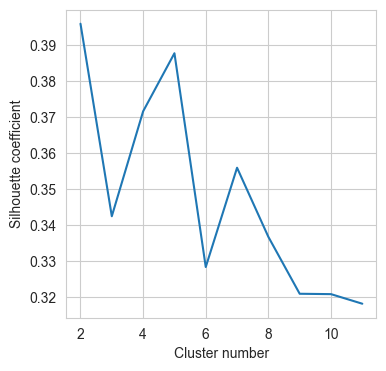

In [12]:
#clustering_dataset = my_dataset[["age", "traveltime", "studytime", "failures", "freetime", "goout", "Dalc", "Walc", "absences","Grade"]]
cluser_dataset = my_dataset[["age", "traveltime", "studytime", "failures", "freetime", "absences", "Grade"]]
Silhouette_coefficient = []
for i in range(2,12):
   k_means_model = KMeans(n_clusters = i, init ="k-means++")
   k_means_model.fit(cluser_dataset)
   Silhouette_coefficient.append(metrics.silhouette_score(cluser_dataset, k_means_model.labels_))

plt.figure(figsize=(4,4))
plt.plot(range(2,12), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

[[1.67000000e+01 1.52000000e+00 2.00000000e+00 5.10000000e-01
  3.30000000e+00 4.52000000e+00 2.41400000e+01]
 [1.64065934e+01 1.29670330e+00 2.19780220e+00 3.29670330e-02
  3.26373626e+00 3.67032967e+00 4.65054945e+01]
 [1.72941176e+01 1.35294118e+00 1.88235294e+00 5.49019608e-01
  3.31372549e+00 1.62352941e+01 3.05098039e+01]
 [1.65178571e+01 1.50892857e+00 2.07142857e+00 1.16071429e-01
  3.21428571e+00 3.23214286e+00 3.47500000e+01]
 [1.78000000e+01 1.40000000e+00 2.00000000e+00 4.00000000e-01
  2.20000000e+00 5.26000000e+01 2.96000000e+01]
 [1.69722222e+01 1.58333333e+00 1.83333333e+00 9.72222222e-01
  3.08333333e+00 4.44444444e-01 1.14722222e+01]]


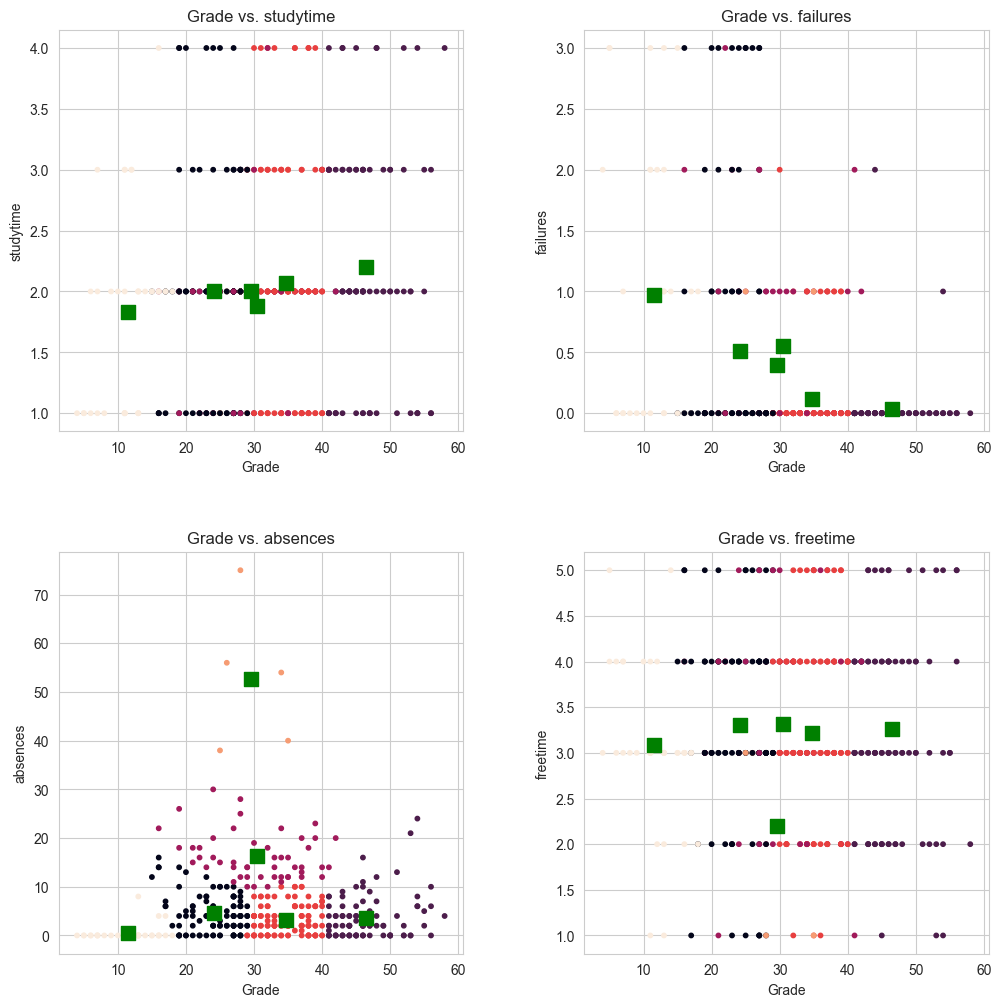

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluser_dataset = my_dataset[["age", "traveltime", "studytime", "failures", "freetime", "absences", "Grade"]]
k_means_model = KMeans(n_clusters=6, init="k-means++").fit(cluser_dataset) #K-means with 6 clusters
centroids = k_means_model.cluster_centers_ #Getting centroids
print(centroids)


y_pred = k_means_model.predict(cluser_dataset)#Predict

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

#Plot 1: Grade vs. studytime
axs[0, 0].scatter(cluser_dataset['Grade'], cluser_dataset['studytime'], s=10, c=y_pred)
axs[0, 0].scatter(centroids[:, 6], centroids[:, 2], s=100, c='g', marker='s')
axs[0, 0].set_title('Grade vs. studytime')
axs[0, 0].set_xlabel('Grade')
axs[0, 0].set_ylabel('studytime')

#Plot 2: Grade vs. failures
axs[0, 1].scatter(cluser_dataset['Grade'], cluser_dataset['failures'], s=10, c=y_pred)
axs[0, 1].scatter(centroids[:, 6], centroids[:, 3], s=100, c='g', marker='s')
axs[0, 1].set_title('Grade vs. failures')
axs[0, 1].set_xlabel('Grade')
axs[0, 1].set_ylabel('failures')

#Plot 3: Grade vs. absences
axs[1, 0].scatter(cluser_dataset['Grade'], cluser_dataset['absences'], s=10, c=y_pred)
axs[1, 0].scatter(centroids[:, 6], centroids[:, 5], s=100, c='g', marker='s')
axs[1, 0].set_title('Grade vs. absences')
axs[1, 0].set_xlabel('Grade')
axs[1, 0].set_ylabel('absences')

#Plot 4: Grade vs. freetime
axs[1, 1].scatter(cluser_dataset['Grade'], cluser_dataset['freetime'], s=10, c=y_pred)#kmeans_model.labels_)
axs[1, 1].scatter(centroids[:, 6], centroids[:, 4], s=100, c='g', marker='s')
axs[1, 1].set_title('Grade vs. freetime')
axs[1, 1].set_xlabel('Grade')
axs[1, 1].set_ylabel('freetime')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## DBSCAN


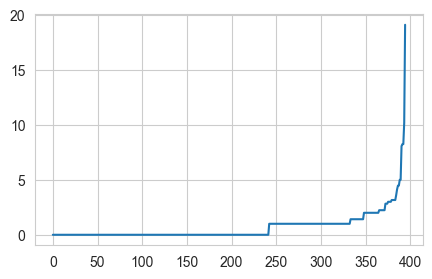

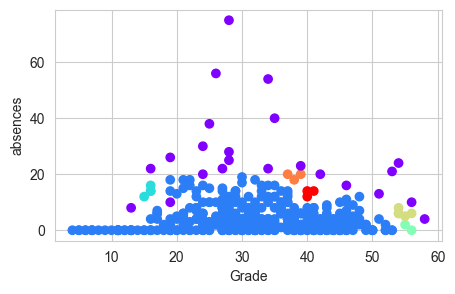

In [14]:
from sklearn.neighbors import NearestNeighbors # importing the library
from sklearn.cluster import DBSCAN

cluser_dataset = my_dataset[["absences", "Grade"]]
neighbors = NearestNeighbors(n_neighbors=2)
neighbor_model=neighbors.fit(cluser_dataset) # fitting the data to the object
distances,indices=neighbor_model.kneighbors(cluser_dataset) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

dbscan_clustering = DBSCAN(eps=2.5, min_samples=2).fit(cluser_dataset)
labels = dbscan_clustering.labels_
plt.scatter(cluser_dataset['Grade'], cluser_dataset['absences'], c = labels, cmap="rainbow") # plotting the clusters
plt.xlabel("Grade") # X-axis label
plt.ylabel("absences") # Y-axis label
plt.show() # showing the plot